Прочитать описание данных. Скачать датасет. Обучить 3 модели классификации. Провести их оценку и ответить какая лучше 

https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. Uploading and preparing data
data = pd.read_csv("IMDB_Dataset.csv")

# Converting text to numeric representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['review'])
y = data['sentiment'].map({'positive': 1, 'negative': 0})

# Separation into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 2. Model Training

# Logistic regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train) #train data
y_pred_logreg = logreg.predict(X_test)  #binary final pred
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

In [9]:
# Random Forest
rf = RandomForestClassifier(n_estimators=50,max_depth=2, random_state=42, n_jobs=-1) #nb d'abre  dans la forêt cinquante
rf.fit(X_train, y_train) 
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [10]:
# CatBoost Utilise le boosting par gradient , decision tree nb trois cent
catboost = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=3, verbose=0, random_state=42)
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)
y_proba_catboost = catboost.predict_proba(X_test)[:, 1]

In [11]:
# 3. Evaluation of models
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n\033[1m{model_name} Results:\033[0m")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"AUC: {roc_auc_score(y_true, y_proba):.4f}")

# Evaluation for each model
evaluate_model(y_test, y_pred_logreg, y_proba_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")
evaluate_model(y_test, y_pred_catboost, y_proba_catboost, "CatBoost")


Logistic Regression Results:
Accuracy: 0.8841
Precision: 0.8813
Recall: 0.8899
F1 Score: 0.8856
AUC: 0.9492

Random Forest Results:
Accuracy: 0.7273
Precision: 0.7165
Recall: 0.7593
F1 Score: 0.7373
AUC: 0.8078

CatBoost Results:
Accuracy: 0.8513
Precision: 0.8300
Recall: 0.8865
F1 Score: 0.8573
AUC: 0.9288


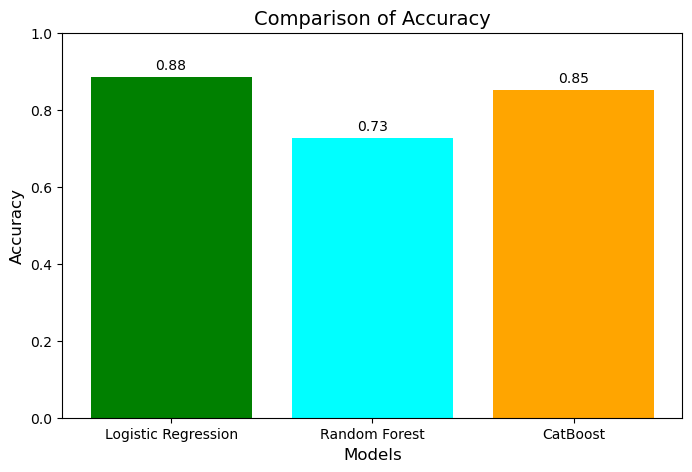

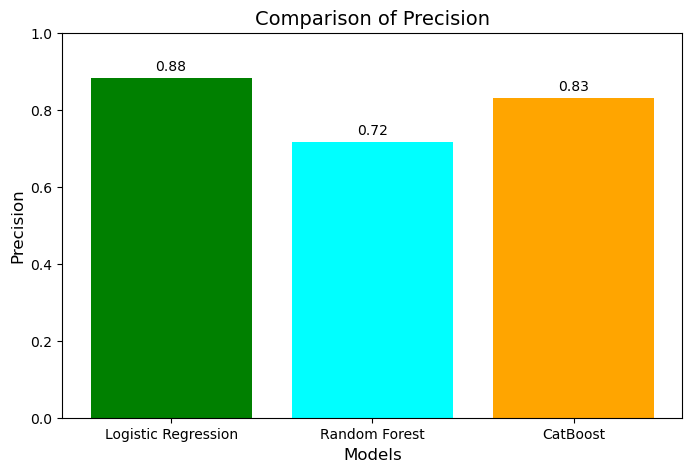

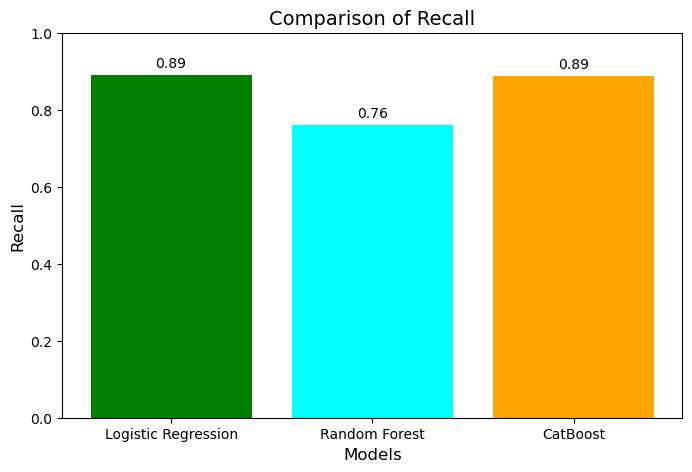

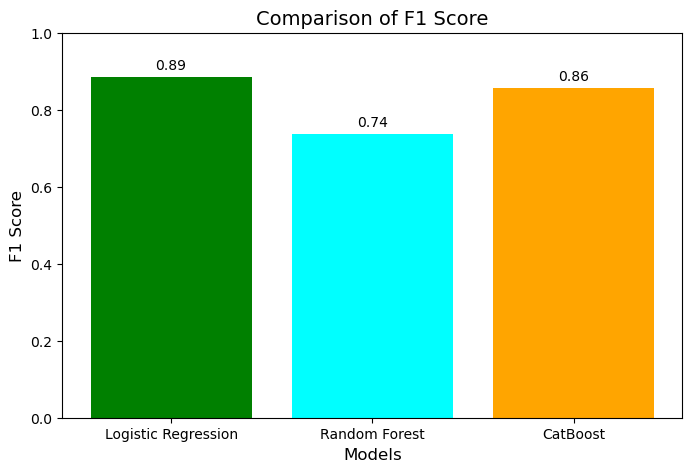

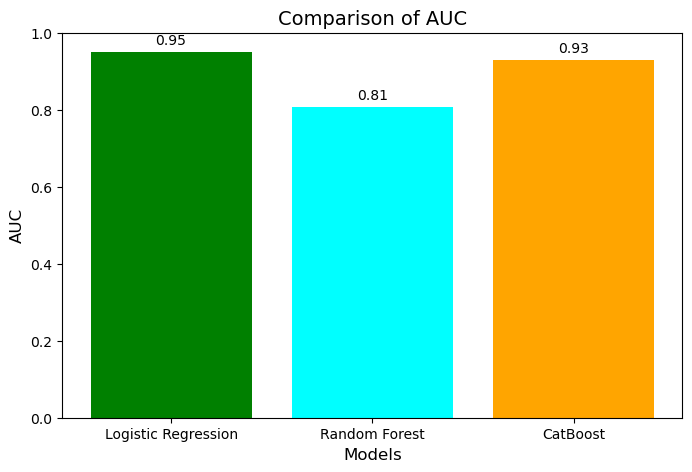

In [13]:
# 4. Charting
models = ["Logistic Regression", "Random Forest", "CatBoost"]
accuracies = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_catboost)]
precisions = [precision_score(y_test, y_pred_logreg), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_catboost)]
recalls = [recall_score(y_test, y_pred_logreg), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_catboost)]
f1_scores = [f1_score(y_test, y_pred_logreg), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_catboost)]
auc_scores = [roc_auc_score(y_test, y_proba_logreg), roc_auc_score(y_test, y_proba_rf), roc_auc_score(y_test, y_proba_catboost)]

metrics = {
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "AUC": auc_scores
}

for metric_name, values in metrics.items():
    plt.figure(figsize=(8, 5))
    plt.bar(models, values, color=['green', 'cyan', 'orange'])
    plt.title(f"Comparison of {metric_name}", fontsize=14)
    plt.ylabel(metric_name, fontsize=12)
    plt.xlabel("Models", fontsize=12)
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    plt.show()